In [9]:
import copy
import pandas as pd
pd.set_option("display.max_columns", None)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from scipy.stats import iqr

In [40]:
df = pd.read_csv('training_variants.csv')

In [3]:
df

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4
...,...,...,...,...
3316,3316,RUNX1,D171N,4
3317,3317,RUNX1,A122*,1
3318,3318,RUNX1,Fusions,1
3319,3319,RUNX1,R80C,4


In [41]:
df['Class'].value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [57]:
df['Gene'].value_counts()[:15]

BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ALK        69
ERBB2      69
PDGFRA     60
PIK3CA     56
CDKN2A     52
FGFR2      50
FLT3       49
TSC2       47
Name: Gene, dtype: int64

In [20]:
df['Variation'].value_counts()[:50]

Truncating Mutations         93
Deletion                     74
Amplification                71
Fusions                      34
Overexpression                6
G12V                          4
Q61L                          3
E17K                          3
T58I                          3
Q61R                          3
Q61H                          3
G35R                          2
S308A                         2
P130S                         2
TMPRSS2-ETV1 Fusion           2
G67R                          2
G13V                          2
R173C                         2
EWSR1-ETV1 Fusion             2
ETV6-NTRK3 Fusion             2
I31M                          2
G12D                          2
R841K                         2
E330K                         2
G13D                          2
A146T                         2
E542K                         2
C618R                         2
A146V                         2
M1R                           2
Q209L                         2
T73I    

In [22]:
df['Class'].value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

<AxesSubplot:>

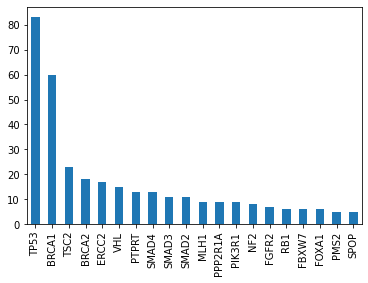

In [44]:
df1 = df[df['Class'] == 1]
df1['Gene'].value_counts()[:20].plot(kind = 'bar')

In [45]:
df1.to_csv('Class1.csv', index = False)

In [75]:
df11 = df1['Gene'].value_counts()

In [82]:
df11 = df11.head(15)
df11

TP53       83
BRCA1      60
TSC2       23
BRCA2      18
ERCC2      17
VHL        15
PTPRT      13
SMAD4      13
SMAD3      11
SMAD2      11
MLH1        9
PPP2R1A     9
PIK3R1      9
NF2         8
FGFR2       7
Name: Gene, dtype: int64

In [ ]:
df11.insert(0,"Gene")

<AxesSubplot:>

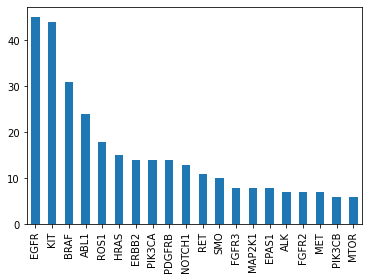

In [31]:
df2 = df[df['Class'] == 2]
df2['Gene'].value_counts()[:20].plot(kind = 'bar')


In [46]:
df2.to_csv('Class2.csv', index = False)

In [87]:
df21 = df2['Gene'].value_counts().head(15)
df21

EGFR      45
KIT       44
BRAF      31
ABL1      24
ROS1      18
HRAS      15
ERBB2     14
PIK3CA    14
PDGFRB    14
NOTCH1    13
RET       11
SMO       10
FGFR3      8
MAP2K1     8
EPAS1      8
Name: Gene, dtype: int64

<AxesSubplot:>

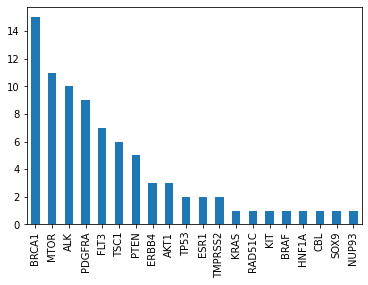

In [32]:
df3 = df[df['Class'] == 3]
df3['Gene'].value_counts()[:20].plot(kind = 'bar')

In [47]:
df3.to_csv('Class3.csv', index = False)

In [88]:
df31 = df3['Gene'].value_counts().head(15)
df31

BRCA1      15
MTOR       11
ALK        10
PDGFRA      9
FLT3        7
TSC1        6
PTEN        5
ERBB4       3
AKT1        3
TP53        2
ESR1        2
TMPRSS2     2
KRAS        1
RAD51C      1
KIT         1
Name: Gene, dtype: int64

<AxesSubplot:>

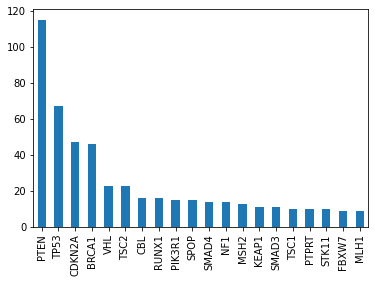

In [33]:
df4 = df[df['Class'] == 4]
df4['Gene'].value_counts()[:20].plot(kind = 'bar')

In [48]:
df4.to_csv('Class4.csv', index = False)

In [89]:
df41 = df4['Gene'].value_counts().head(15)
df41

PTEN      115
TP53       67
CDKN2A     47
BRCA1      46
VHL        23
TSC2       23
CBL        16
RUNX1      16
PIK3R1     15
SPOP       15
SMAD4      14
NF1        14
MSH2       13
KEAP1      11
SMAD3      11
Name: Gene, dtype: int64

<AxesSubplot:>

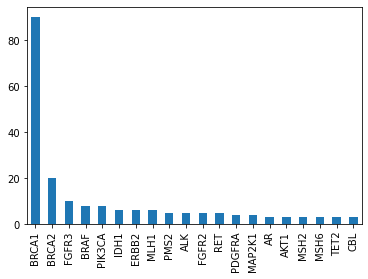

In [34]:
df5 = df[df['Class'] == 5]
df5['Gene'].value_counts()[:20].plot(kind = 'bar')

In [49]:
df5.to_csv('Class5.csv', index = False)

In [90]:
df51 = df5['Gene'].value_counts().head(15)
df51

BRCA1     90
BRCA2     20
FGFR3     10
BRAF       8
PIK3CA     8
IDH1       6
ERBB2      6
MLH1       6
PMS2       5
ALK        5
FGFR2      5
RET        5
PDGFRA     4
MAP2K1     4
AR         3
Name: Gene, dtype: int64

<AxesSubplot:>

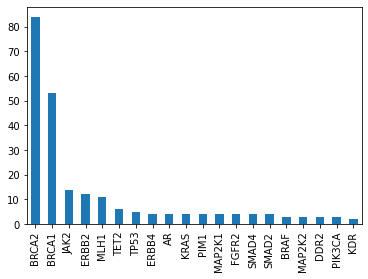

In [35]:
df6 = df[df['Class'] == 6]
df6['Gene'].value_counts()[:20].plot(kind = 'bar')

In [50]:
df6.to_csv('Class6.csv', index = False)

In [91]:
df61 = df6['Gene'].value_counts().head(15)
df61

BRCA2     84
BRCA1     53
JAK2      14
ERBB2     12
MLH1      11
TET2       6
TP53       5
ERBB4      4
AR         4
KRAS       4
PIM1       4
MAP2K1     4
FGFR2      4
SMAD4      4
SMAD2      4
Name: Gene, dtype: int64

<AxesSubplot:>

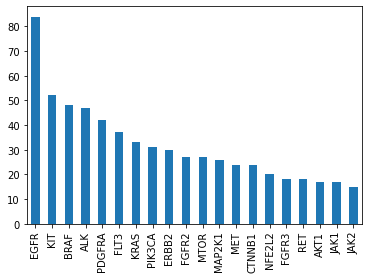

In [36]:
df7 = df[df['Class'] == 7]
df7['Gene'].value_counts()[:20].plot(kind = 'bar')

In [51]:
df7.to_csv('Class7.csv', index = False)

In [92]:
df71 = df7['Gene'].value_counts().head(15)
df71

EGFR      84
KIT       52
BRAF      48
ALK       47
PDGFRA    42
FLT3      37
KRAS      33
PIK3CA    31
ERBB2     30
FGFR2     27
MTOR      27
MAP2K1    26
MET       24
CTNNB1    24
NFE2L2    20
Name: Gene, dtype: int64

<AxesSubplot:>

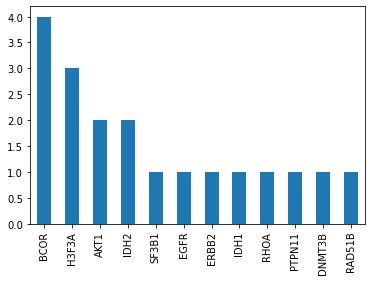

In [42]:
df8 = df[df['Class'] == 8]
df8['Gene'].value_counts().plot(kind = 'bar')

In [52]:
df8.to_csv('Class8.csv', index = False)

In [93]:
df81 = df8['Gene'].value_counts().head(15)
df81

BCOR      4
H3F3A     3
AKT1      2
IDH2      2
SF3B1     1
EGFR      1
ERBB2     1
IDH1      1
RHOA      1
PTPN11    1
DNMT3B    1
RAD51B    1
Name: Gene, dtype: int64

<AxesSubplot:>

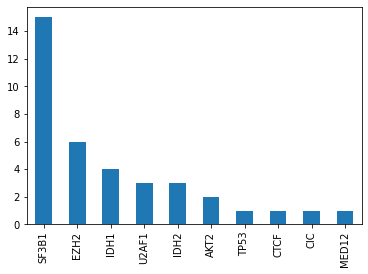

In [43]:
df9 = df[df['Class'] == 9]
df9['Gene'].value_counts()[:20].plot(kind = 'bar')

In [53]:
df9.to_csv('Class9.csv', index = False)

In [55]:
df9 = pd.read_csv('Class9.csv')

In [94]:
df91 = df9['Gene'].value_counts().head(15)
df91

SF3B1    15
EZH2      6
IDH1      4
U2AF1     3
IDH2      3
AKT2      2
TP53      1
CTCF      1
CIC       1
MED12     1
Name: Gene, dtype: int64

In [83]:
df11 = pd.read_csv('Class1_1.csv')

In [84]:
df11

,Gene,Count
0,TP53,83
1,BRCA1,60
2,TSC2,23
3,BRCA2,18
4,ERCC2,17
5,VHL,15
6,PTPRT,13
7,SMAD4,13
8,SMAD3,11
9,SMAD2,11


In [104]:
data_text.to_csv("training_text.csv")

In [105]:
data_text

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...
...,...,...
3316,3316,Introduction Myelodysplastic syndromes (MDS) ...
3317,3317,Introduction Myelodysplastic syndromes (MDS) ...
3318,3318,The Runt-related transcription factor 1 gene (...
3319,3319,The RUNX1/AML1 gene is the most frequent targe...


In [106]:
data_text.to_csv('training_text.csv', index = False)

In [107]:
tf = pd.read_csv('training_text.csv')

In [108]:
tf

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...
...,...,...
3316,3316,Introduction Myelodysplastic syndromes (MDS) ...
3317,3317,Introduction Myelodysplastic syndromes (MDS) ...
3318,3318,The Runt-related transcription factor 1 gene (...
3319,3319,The RUNX1/AML1 gene is the most frequent targe...


In [109]:
df_final = df.merge(tf,on='ID')

In [110]:
df_final

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...


In [111]:
df_final.to_csv("df_final.csv", index = False)

In [113]:
import nltk

In [115]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pavanyadavmac/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [116]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [119]:
import re

In [123]:
def data_text_preprocess(total_text, ind, col):
    # Remove int values from text data as that might not be imp
    if type(total_text) is not int:
        string = ""
        # replacing all special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', str(total_text))
        # replacing multiple spaces with single space
        total_text = re.sub('\s+',' ', str(total_text))
        # bring whole text to same lower-case scale.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from text
            if not word in stop_words:
                string += word + " "
        
        df_final[col][ind] = string

In [124]:
for index, row in df_final.iterrows():
    if type(row['TEXT']) is str:
        data_text_preprocess(row['TEXT'], index, 'TEXT')

/var/folders/85/z8gc4p_x1_s45wbp3sxx11440000gn/T/ipykernel_14461/2835623675.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [125]:
df_final.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [126]:
df_final.to_csv("df_final.csv", index = False)

In [127]:
df_final.groupby('Class')

In [128]:
df_final.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [130]:
data_types_dict = {'TEXT': str}
df_final = df_final.astype(data_types_dict)

In [131]:
tf1 = df_final.groupby('Class', as_index=False)['TEXT'].apply(' '.join)

In [133]:
tf1

,Class,TEXT
0,1,cyclin dependent kinases cdks regulate variety...
1,2,abstract background non small cell lung cancer...
2,3,recent evidence demonstrated acquired uniparen...
3,4,oncogenic mutations monomeric casitas b lineag...
4,5,oncogenic mutations monomeric casitas b lineag...
5,6,abstract background non small cell lung cancer...
6,7,sequencing studies identified many recurrent c...
7,8,rna maturation important complex biological pr...
8,9,rna maturation important complex biological pr...


In [134]:
tf1.to_csv("class_text.csv", index = False)

In [136]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pavanyadavmac/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [155]:
tf1 = pd.read_csv('class_text.csv')

In [156]:
tf1['tokenized_sents'] = tf1.apply(lambda row: nltk.word_tokenize(row['TEXT']), axis=1)

In [157]:
tf1

,Class,TEXT,tokenized_sents
0,1,cyclin dependent kinases cdks regulate variety...,"[cyclin, dependent, kinases, cdks, regulate, v..."
1,2,abstract background non small cell lung cancer...,"[abstract, background, non, small, cell, lung,..."
2,3,recent evidence demonstrated acquired uniparen...,"[recent, evidence, demonstrated, acquired, uni..."
3,4,oncogenic mutations monomeric casitas b lineag...,"[oncogenic, mutations, monomeric, casitas, b, ..."
4,5,oncogenic mutations monomeric casitas b lineag...,"[oncogenic, mutations, monomeric, casitas, b, ..."
5,6,abstract background non small cell lung cancer...,"[abstract, background, non, small, cell, lung,..."
6,7,sequencing studies identified many recurrent c...,"[sequencing, studies, identified, many, recurr..."
7,8,rna maturation important complex biological pr...,"[rna, maturation, important, complex, biologic..."
8,9,rna maturation important complex biological pr...,"[rna, maturation, important, complex, biologic..."


In [158]:
tf2 = tf1[:1]

In [172]:
tf2['tokenized_sents']

0    [cyclin, dependent, kinases, cdks, regulate, v...
Name: tokenized_sents, dtype: object

In [182]:
Classt1 = tf2.drop(['Class','TEXT'], axis = 1)

In [183]:
Classt1

,tokenized_sents
0,"[cyclin, dependent, kinases, cdks, regulate, v..."


In [196]:
Classt1.to_csv('Classtext1.csv')

In [200]:
ml = Classt1['tokenized_sents'][0]

In [202]:
type(ml)

list

In [225]:
l = ['0','1','2','3','4','5','6','7','8','9','et','al','fig','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','figure','y','z']
ml1 = [x for x in ml if x not in l]

In [226]:
frequency = {}

# iterating over the list
for item in ml1:
   # checking the element in dictionary
   if item in frequency:
      # incrementing the counr
      frequency[item] += 1
   else:
      # initializing the count
      frequency[item] = 1

# printing the frequency
type(frequency)

dict

In [227]:
sorted1 = sorted(frequency.items(), key=lambda x:x[1], reverse=True)

In [229]:
sorted1[:20]

[('mutations', 33734),
 ('cells', 28451),
 ('cell', 20386),
 ('p53', 19542),
 ('protein', 18145),
 ('cancer', 17988),
 ('mutation', 17261),
 ('dna', 15457),
 ('binding', 15436),
 ('type', 15189),
 ('expression', 14541),
 ('variants', 13775),
 ('gene', 12854),
 ('mutant', 12729),
 ('wild', 12034),
 ('tumor', 11925),
 ('domain', 11238),
 ('also', 11170),
 ('using', 10732),
 ('analysis', 10544)]

In [233]:
tf2 = tf1[1:2]

In [234]:
tf2

,Class,TEXT,tokenized_sents
1,2,abstract background non small cell lung cancer...,"[abstract, background, non, small, cell, lung,..."


In [243]:
Classt2 = tf2.drop(['Class','TEXT'], axis = 1)

In [244]:
Classt2.to_csv('Classtext2.csv')

In [246]:
Classt2

,tokenized_sents
1,"[abstract, background, non, small, cell, lung,..."


In [247]:
ml = Classt2['tokenized_sents'][1]

In [248]:
l = ['0','1','2','3','4','5','6','7','8','9','et','al','fig','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','figure','y','z']
ml2 = [x for x in ml if x not in l]

In [253]:
frequency = {}

# iterating over the list
for item in ml2:
   # checking the element in dictionary
   if item in frequency:
      # incrementing the counr
      frequency[item] += 1
   else:
      # initializing the count
      frequency[item] = 1

# printing the frequency
type(frequency)

dict

In [254]:
frequency

{'abstract': 158,
 'background': 400,
 'non': 2761,
 'small': 2955,
 'cell': 18315,
 'lung': 4323,
 'cancer': 13271,
 'nsclc': 2684,
 'heterogeneous': 309,
 'group': 2519,
 'disorders': 373,
 'number': 4571,
 'genetic': 2276,
 'proteomic': 21,
 'alterations': 2923,
 'cbl': 952,
 'e3': 156,
 'ubiquitin': 294,
 'ligase': 223,
 'adaptor': 153,
 'molecule': 782,
 'important': 1901,
 'normal': 3030,
 'homeostasis': 71,
 'determined': 1423,
 'variations': 218,
 'relationship': 276,
 'receptor': 4338,
 'tyrosine': 3357,
 'kinases': 1724,
 'egfr': 11886,
 'met': 4647,
 'functionality': 24,
 'methods': 1899,
 'findings': 1528,
 'using': 8822,
 'archival': 42,
 'formalin': 380,
 'fixed': 580,
 'paraffin': 574,
 'embedded': 527,
 'ffpe': 316,
 'extracted': 575,
 'genomic': 2272,
 'dna': 5250,
 'show': 1650,
 'mutations': 34612,
 'occur': 1060,
 'somatic': 2292,
 'fashion': 157,
 'cancers': 3083,
 'mutually': 312,
 'exclusive': 361,
 'however': 4245,
 'independent': 2395,
 'p53': 1351,
 'kras': 33

In [255]:
sorted2 = sorted(frequency.items(), key=lambda x:x[1], reverse=True)

In [256]:
sorted2[:20]

[('mutations', 34612),
 ('cells', 23165),
 ('patients', 19283),
 ('cell', 18315),
 ('mutation', 15202),
 ('cancer', 13271),
 ('kinase', 12655),
 ('egfr', 11886),
 ('tumor', 11282),
 ('kit', 10434),
 ('gene', 10057),
 ('expression', 9899),
 ('tumors', 8968),
 ('using', 8822),
 ('also', 8720),
 ('exon', 8505),
 ('mutant', 8302),
 ('braf', 8209),
 ('activity', 8059),
 ('domain', 7897)]

In [257]:
tf3 = tf1[2:3]

In [258]:
tf3

,Class,TEXT,tokenized_sents
2,3,recent evidence demonstrated acquired uniparen...,"[recent, evidence, demonstrated, acquired, uni..."


In [259]:
Classt3 = tf3.drop(['Class','TEXT'], axis = 1)

In [260]:
Classt3

,tokenized_sents
2,"[recent, evidence, demonstrated, acquired, uni..."


In [262]:
ml = Classt3['tokenized_sents'][2]

In [263]:
l = ['0','1','2','3','4','5','6','7','8','9','et','al','fig','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','figure','y','z']
ml3 = [x for x in ml if x not in l]

In [264]:
frequency = {}

# iterating over the list
for item in ml3:
   # checking the element in dictionary
   if item in frequency:
      # incrementing the counr
      frequency[item] += 1
   else:
      # initializing the count
      frequency[item] = 1

# printing the frequency
type(frequency)

dict

In [265]:
sorted3 = sorted(frequency.items(), key=lambda x:x[1], reverse=True)

In [266]:
sorted3[:20]

[('mutations', 6258),
 ('brca1', 4331),
 ('cells', 3900),
 ('variants', 2937),
 ('cancer', 2648),
 ('mutation', 2187),
 ('alk', 2075),
 ('activity', 1845),
 ('cell', 1753),
 ('protein', 1650),
 ('mtor', 1642),
 ('mutants', 1636),
 ('assay', 1612),
 ('expression', 1528),
 ('domain', 1453),
 ('functional', 1418),
 ('flt3', 1412),
 ('mutant', 1382),
 ('kinase', 1358),
 ('analysis', 1335)]

In [267]:
tf4 = tf1[3:4]
Classt4 = tf4.drop(['Class','TEXT'], axis = 1)
ml = Classt4['tokenized_sents'][3]

In [269]:
l = ['0','1','2','3','4','5','6','7','8','9','et','al','fig','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','figure','y','z']
ml4 = [x for x in ml if x not in l]

In [270]:
frequency = {}

# iterating over the list
for item in ml4:
   # checking the element in dictionary
   if item in frequency:
      # incrementing the counr
      frequency[item] += 1
   else:
      # initializing the count
      frequency[item] = 1

# printing the frequency
type(frequency)

dict

In [271]:
sorted4 = sorted(frequency.items(), key=lambda x:x[1], reverse=True)
sorted4[:20]

[('mutations', 46501),
 ('cells', 37115),
 ('pten', 25841),
 ('protein', 24278),
 ('activity', 21625),
 ('cell', 21223),
 ('brca1', 18374),
 ('mutation', 17934),
 ('variants', 17006),
 ('type', 16929),
 ('cancer', 16690),
 ('binding', 16340),
 ('expression', 16115),
 ('p53', 15171),
 ('mutant', 14047),
 ('wild', 13485),
 ('mutants', 13455),
 ('domain', 13245),
 ('also', 13053),
 ('dna', 12729)]

In [272]:
tf5 = tf1[4:5]
Classt5 = tf5.drop(['Class','TEXT'], axis = 1)
ml = Classt5['tokenized_sents'][4]

In [273]:
l = ['0','1','2','3','4','5','6','7','8','9','et','al','fig','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','figure','y','z']
ml5 = [x for x in ml if x not in l]

In [274]:
frequency = {}

# iterating over the list
for item in ml5:
   # checking the element in dictionary
   if item in frequency:
      # incrementing the counr
      frequency[item] += 1
   else:
      # initializing the count
      frequency[item] = 1

# printing the frequency
sorted5 = sorted(frequency.items(), key=lambda x:x[1], reverse=True)
sorted5[:20]

[('brca1', 14800),
 ('variants', 14393),
 ('mutations', 13072),
 ('cancer', 7886),
 ('cells', 7506),
 ('protein', 6153),
 ('mutation', 5806),
 ('functional', 5656),
 ('type', 5453),
 ('vus', 5384),
 ('data', 5338),
 ('assays', 4890),
 ('activity', 4881),
 ('wild', 4546),
 ('cell', 4364),
 ('domain', 4332),
 ('assay', 4278),
 ('neutral', 4268),
 ('analysis', 4210),
 ('binding', 4188)]

In [275]:
tf6 = tf1[5:6]
Classt6 = tf6.drop(['Class','TEXT'], axis = 1)
ml = Classt6['tokenized_sents'][5]
l = ['0','1','2','3','4','5','6','7','8','9','et','al','fig','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','figure','y','z']
ml6 = [x for x in ml if x not in l]

In [276]:
frequency = {}

# iterating over the list
for item in ml6:
   # checking the element in dictionary
   if item in frequency:
      # incrementing the counr
      frequency[item] += 1
   else:
      # initializing the count
      frequency[item] = 1

# printing the frequency
sorted6 = sorted(frequency.items(), key=lambda x:x[1], reverse=True)
sorted6[:20]

[('brca1', 14211),
 ('mutations', 12151),
 ('variants', 11526),
 ('cancer', 7075),
 ('mutation', 6876),
 ('cells', 6480),
 ('deleterious', 5788),
 ('data', 5482),
 ('binding', 5268),
 ('protein', 4844),
 ('activity', 4659),
 ('analysis', 4544),
 ('dna', 4431),
 ('domain', 4399),
 ('cell', 4367),
 ('type', 4316),
 ('kinase', 4201),
 ('brca2', 4097),
 ('using', 3949),
 ('variant', 3921)]

In [278]:
tf7 = tf1[6:7]
Classt7 = tf7.drop(['Class','TEXT'], axis = 1)
ml = Classt7['tokenized_sents'][6]
l = ['0','1','2','3','4','5','6','7','8','9','et','al','fig','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','figure','y','z']
ml7 = [x for x in ml if x not in l]
frequency = {}

# iterating over the list
for item in ml7:
   # checking the element in dictionary
   if item in frequency:
      # incrementing the counr
      frequency[item] += 1
   else:
      # initializing the count
      frequency[item] = 1

# printing the frequency
sorted7 = sorted(frequency.items(), key=lambda x:x[1], reverse=True)
sorted7[:20]

[('mutations', 86920),
 ('cells', 73917),
 ('cell', 53149),
 ('patients', 43224),
 ('mutation', 38643),
 ('egfr', 37636),
 ('kinase', 34931),
 ('cancer', 32148),
 ('mutant', 27495),
 ('expression', 26851),
 ('tumor', 26342),
 ('activity', 24385),
 ('activation', 23936),
 ('also', 23093),
 ('kit', 23065),
 ('domain', 22396),
 ('tumors', 22255),
 ('ras', 21912),
 ('10', 20789),
 ('using', 20781)]

In [279]:
tf8 = tf1[7:8]
Classt8 = tf8.drop(['Class','TEXT'], axis = 1)
ml = Classt8['tokenized_sents'][7]
l = ['0','1','2','3','4','5','6','7','8','9','et','al','fig','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','figure','y','z']
ml8 = [x for x in ml if x not in l]
frequency = {}

# iterating over the list
for item in ml8:
   # checking the element in dictionary
   if item in frequency:
      # incrementing the counr
      frequency[item] += 1
   else:
      # initializing the count
      frequency[item] = 1

# printing the frequency
sorted8 = sorted(frequency.items(), key=lambda x:x[1], reverse=True)
sorted8[:20]

[('cells', 1374),
 ('mutations', 1329),
 ('expression', 912),
 ('cell', 768),
 ('genes', 646),
 ('mutant', 620),
 ('gene', 619),
 ('idh1', 586),
 ('using', 576),
 ('mutation', 572),
 ('cancer', 562),
 ('data', 549),
 ('akt', 525),
 ('dna', 517),
 ('tumors', 514),
 ('h3', 506),
 ('tumor', 486),
 ('also', 457),
 ('samples', 454),
 ('idh2', 422)]

In [280]:
tf9 = tf1[8:9]
Classt9 = tf9.drop(['Class','TEXT'], axis = 1)
ml = Classt9['tokenized_sents'][8]
l = ['0','1','2','3','4','5','6','7','8','9','et','al','fig','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','figure','y','z']
ml9 = [x for x in ml if x not in l]
frequency = {}

# iterating over the list
for item in ml9:
   # checking the element in dictionary
   if item in frequency:
      # incrementing the counr
      frequency[item] += 1
   else:
      # initializing the count
      frequency[item] = 1

# printing the frequency
sorted9 = sorted(frequency.items(), key=lambda x:x[1], reverse=True)
sorted9[:20]

[('cells', 3924),
 ('mutations', 3591),
 ('mutant', 2853),
 ('sf3b1', 2767),
 ('cell', 2332),
 ('splicing', 2178),
 ('idh1', 1900),
 ('expression', 1731),
 ('using', 1517),
 ('genes', 1511),
 ('type', 1495),
 ('2hg', 1403),
 ('wild', 1387),
 ('ezh2', 1372),
 ('u2af1', 1353),
 ('idh2', 1263),
 ('mutation', 1190),
 ('analysis', 1129),
 ('idh', 1119),
 ('rna', 1097)]